<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a><center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em>

# NLP Projekt - Lösung

Willkommen zum NLP Projekt des Kurses. In diesem NLP Projekt werden wir versuchen Yelp Reviews in 1 Stern oder 5 Sterne Kategorien zu klassifizieren. Dazu nutzen wir den Text ihrere Bewertung. Dieses Prozedere wird leichter sein als das der Lektion, da wir die Pipeline für komplexe Aufgaben verwenden werden. 

Wir nutzen [Yelp Review Daten von Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Jede Beobachtung in dem Datensatz ist eine bestimmte Bewertung eines bestimmten Geschäfts durch einen bestimmten Nutzer.

Die "stars" Spalte beinhaltet die Anzahl der Sterne (1 bis 5) die der Bewerter dem Geschäft verliehen hat. In anderne Worten: Die Bewertung des Geschäfts durch den Autor. 

Die "cool" Spalte beinhaltet die Anzahl der "Cool"-Votes der Bewertung durch andere Nutzer.

Alle Bewertungen starten mit 0 "Cool"-Votes und es gibt nach oben kein Limit. Je mehr Leute die Bewertung "Cool" finden und sie so voten, desto höhere die Anzahl.

Für die "useful" (dt. nützlich) und "funny" (dt. witzig) Spalten gilt das gleiche.

Legen wir los! Folge den Anweisungen!

## Imports

**Importiere die üblichen Verdächtigen.**

In [1]:
import numpy as np
import pandas as pd

## Die Daten

**Lese yelp.csv ein und setze es zu einem DataFrame namens "yelp".**

In [2]:
yelp = pd.read_csv('Yelp.csv')

**Schaue dir den head, die info und die describe Methode des DataFrames an.**

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Erstelle eine neue Spalte namens "text length", welche die Anzahl von Zeichen der "text" Spalte beinhaltet.**

In [6]:
yelp['text length'] = yelp['text'].apply(len)

## EDA

**Falls du es nicht schon oben getan hast: Importiere jetzt auch die Visualisierungs.Libraries.**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Nutze FacetGrid von Seaborn, um ein Grid von 5 Histogrammen zu erzeugen. Diese sollen auf den "stars" basieren.**

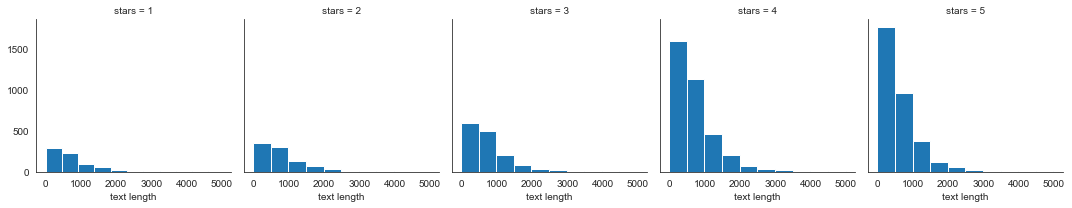

In [8]:
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

**Erstelle ein Boxplot der Textlänge für jede Stern-Kategorie.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

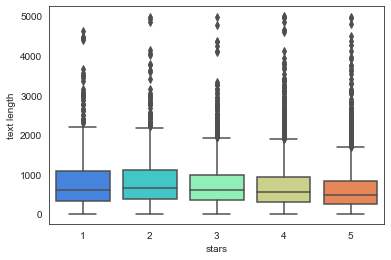

In [9]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

**Erstelle ein Countplot für die Anzahl an Erscheinungen jeder Stern-Kategorie.**

<AxesSubplot:xlabel='stars', ylabel='count'>

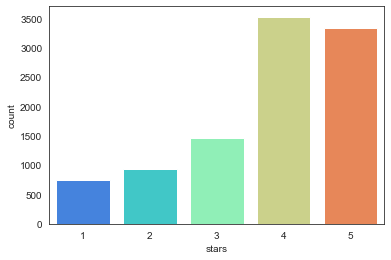

In [10]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

**Nutze groupby für die Stern-Kategorie, um den Durchschnittswert der numerischen Spalten zu erhalten. (Du sollst einen neuen DataFrame "stars" erhalten)**

In [11]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Nutze die corr() Methode auf den groupby-DataFrame um diesen DataFrame zu erhalten:**

In [12]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


** Nutze jetzt Seaborn, um eine Heatmap der Korrelationen zu erhalten.**

<AxesSubplot:>

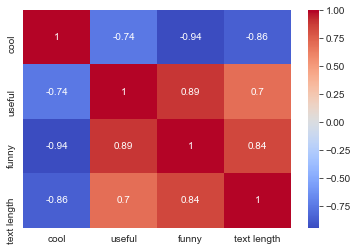

In [13]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

## NLP Klassifizierungsaufgabe

Fahren wir nun mit der eigentlichen Aufgabe fort. Um das ein wenig einfacher zu machen verwende nur die Bewertungen, die entweder einen oder fünf Sterne hatten.

**Erstelle einen DataFrame namens "yelp_class", die alle Spalten aus dem yelp DataFrame beinhaltet, aber nur für 1 und 5 Sterne.**

In [14]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

**Erstelle zwei Objekte X und y. X wird der "text" aus yelp_class und y wird die "stars" sein.**

In [15]:
X = yelp_class['text']
y = yelp_class['stars']

**Importiere `CountVectorizer` und erstelle ein CountVectorizer Objekt.**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

**Nutze die `fit_transform` Methode auf das CountVectorizer Objekt und übergebe X (die "text" Spalte). Speichere dieses Ergebnis, indem du X überschreibst.**

In [17]:
X = cv.fit_transform(X)

## Train Test Split

Teilen wir nun unsere Daten in Trainings- und Testset auf.

**Nutze train_test_split, um die Daten in X_train, X_test, y_train und y_test zu teilen. Nutze test_size = 0.3 und random_state = 101.**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Das Modell trainieren

Es ist Zeit unser Modell zu trainieren.

**Importiere MultinominalNB und erstelle eine Instanz des Schätzers namens nb.**

In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Jetzt fitte nb indem du die Trainingsdaten verwendest.**

In [21]:
nb.fit(X_train,y_train)

MultinomialNB()

## Vorhersagen und Auswertung

Wir sollten nun überprüfen, wie sich unser Modell angstellt hat!

**Nutze die `predict` Methode, um von nb ausgehend X_test vorherzusagen.**

In [22]:
predictions = nb.predict(X_test)

**Erstelle eine Confusion Matrix und einen Classification Report für diese Vorhersagen in Kombi mit y_test.**

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



Toll! Schauen wir uns jetzt an, was passiert, wenn wir TF-IDF in den Prozess mit einbeziehen. Wir verwenden dazu die Pipeline.

## Text Processing verwenden

**Importiere `TfidfTransformer` von Scikit.**

In [25]:
from sklearn.feature_extraction.text import  TfidfTransformer

**Importiere `Pipeline` von Scikit.**

In [26]:
from sklearn.pipeline import Pipeline

**Erstelle jetzt eine Pipeline mit den folgenden Schritten: CountVectorizer(), TfidfTransformer(), MultinominalNB().**

In [27]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

### Die Pipeline nutzen

Zeit unsere Pipeline zu nutzen! Denke daran, dass die Pipeline alle Pre-Processing-Schritte enthält. Wir müssen die Original-Daten erneut aufteilen. Behalte dabei im Kopf, dass wir X vereits mit CountVecotized überschrieben haben. Wir wollen zuerst nur den Text.

## Train Test Split

**Führe den Train Test Split erneut für das yelp_class objekt.**

In [28]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Fitte jetzt die Pipeline auf die Trainingsdaten. Denke daran, dass wir nicht die selben Trainingsdaten wie beim letzen Mal verwenden können, da diese bereits Vektorisiert wurden. Für unsere Pipeline brauchen wir nur den Text.**

In [29]:
# Könnte etwas Zeit beanspruchen
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

## Vorhersagen und Auswertung

**Nutze jetzt die Pipeline um die Sterne für X_test vorherzusagen. Erstelle dann Classification Report und Confusion Matrix.**

*Hinweis: Die Ergebnisse sollten komisch sein.**

In [30]:
predictions = pipeline.predict(X_test)

In [31]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions, labels=np.unique(predictions)))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           5       0.81      1.00      0.90       998

   micro avg       0.81      1.00      0.90       998
   macro avg       0.81      1.00      0.90       998
weighted avg       0.81      1.00      0.90       998



Sieht aus, als ob TF-IDF unsere Ergebnisse verschlechtert hat. Das war es für dieses Projekt. Falls du mit diesem letzen Ergebnis unzufireden bist gibt es einige Anrekungen, die du noch ausprobieren kannst:

Versuche die Schritte der Pipeline anzupassen. Evtl. kannst du einen eigenen Analyzer erstellen (wie wir es in der Lektion getan haben). Oder verwende nur CountVectorizer() und NaiveBayes in der Pipeline. Oder hilft evtl. die Verwendung eines anderen ML-Klassifizierungsmodells?

# Gut gemacht!